<center>
<img src="../img/ods_stickers.jpg">
## Открытый курс по машинному обучению
Автор материала: Мария Мансурова, аналитик-разработчик в команде Яндекс.Метрики 
    
Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center> Домашнее задание № 9. (демо)
## <center> Анализ временных рядов
    
**Заполните пропущенный код и ответьте на вопросы в [онлайн-форме](https://docs.google.com/forms/d/1ijk4aFKY5plPiI8z3Mgi3i1Ln94VBY9SSt6xGIdVVFQ/).**

In [1]:
import pandas as pd
import os
from tqdm import tqdm

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import graph_objs as go
import requests
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

print(__version__) # need 1.9.0 or greater

init_notebook_mode(connected = True)

def plotly_df(df, title = ''):
    data = []
    
    for column in df.columns:
        trace = go.Scatter(
            x = df.index,
            y = df[column],
            mode = 'lines',
            name = column
        )
        data.append(trace)
    
    layout = dict(title = title)
    fig = dict(data = data, layout = layout)
    iplot(fig, show_link=False)

3.1.0


## Подготавливаем данные

Для начала скачаем данные в `dataframe`. Сегодня будем предсказывать просмотры wiki-страницы [Machine Learning](https://en.wikipedia.org/wiki/Machine_learning). Данные я скачала с помощью библиотеки [Wikipediatrend](https://www.r-bloggers.com/using-wikipediatrend/) для `R`.

In [2]:
df = pd.read_csv('../data/wiki_machine_learning.csv', sep = ' ')
df = df[df['count'] != 0]
df.head()

,date,count,lang,page,rank,month,title
81,2015-01-01,1414,en,Machine_learning,8708,201501,Machine_learning
80,2015-01-02,1920,en,Machine_learning,8708,201501,Machine_learning
79,2015-01-03,1338,en,Machine_learning,8708,201501,Machine_learning
78,2015-01-04,1404,en,Machine_learning,8708,201501,Machine_learning
77,2015-01-05,2264,en,Machine_learning,8708,201501,Machine_learning


In [3]:
df.shape

(383, 7)

In [4]:
df.date = pd.to_datetime(df.date)

In [5]:
plotly_df(df.set_index('date')[['count']])

## Предсказание с помощью Facebook Prophet

Для начала построим предсказание с помощью простой библиотеки `Facebook Prophet`. Для того, чтобы посмотреть на качество модели, отбросим из обучающей выборки последние 30 дней.

In [6]:
from fbprophet import Prophet

In [7]:
predictions = 30

df = df[['date', 'count']]
df.columns = ['ds', 'y']
train_df = df[:-predictions].copy()
valid_df = df[-predictions:].copy()

In [8]:
## ВАШ КОД для построения модели ##
prophet = Prophet()
prophet.fit(train_df);

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


**Вопрос 1:** Какое предсказание числа просмотров wiki-страницы на 20 января? Ответ округлите до целого числа.

Оценим качество предсказания по последним 30 точкам.

In [9]:
future = prophet.make_future_dataframe(periods=predictions)
future.tail()

,ds
378,2016-01-16
379,2016-01-17
380,2016-01-18
381,2016-01-19
382,2016-01-20


In [10]:
## ВАШ КОД для оценки качества полученной модели ##
predict_df = prophet.predict(future)
predict_df.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01,2166.150016,2090.305015,2889.847981,2166.150016,2166.150016,327.023530,327.023530,327.023530,327.023530,327.023530,327.023530,0.0,0.0,0.0,2493.173547
1,2015-01-02,2168.888783,1749.382154,2575.030186,2168.888783,2168.888783,7.050464,7.050464,7.050464,7.050464,7.050464,7.050464,0.0,0.0,0.0,2175.939247
2,2015-01-03,2171.627549,881.172744,1752.644255,2171.627549,2171.627549,-861.707294,-861.707294,-861.707294,-861.707294,-861.707294,-861.707294,0.0,0.0,0.0,1309.920255
3,2015-01-04,2174.366315,1035.116185,1863.011349,2174.366315,2174.366315,-720.725103,-720.725103,-720.725103,-720.725103,-720.725103,-720.725103,0.0,0.0,0.0,1453.641212
4,2015-01-05,2177.105081,2050.819348,2863.850308,2177.105081,2177.105081,281.348266,281.348266,281.348266,281.348266,281.348266,281.348266,0.0,0.0,0.0,2458.453347


In [11]:
count_predict = predict_df[predict_df['ds'] == '2016-01-20']['yhat'].values
print('Prediction for 2016-01-20: %.f' % count_predict)

Prediction for 2016-01-20: 3428


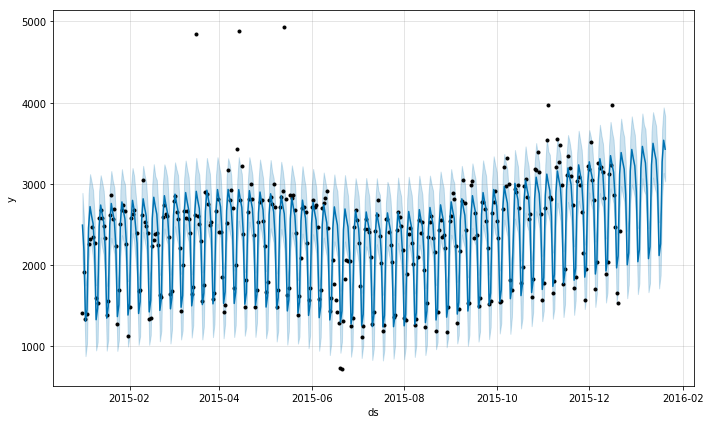

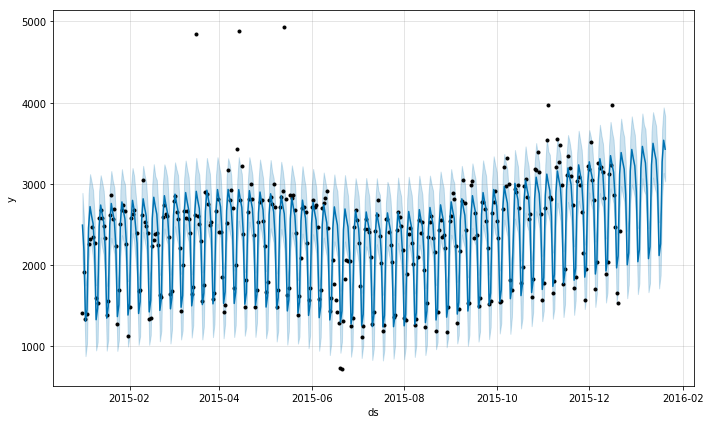

In [12]:
prophet.plot(predict_df)

In [13]:
from sklearn.metrics import mean_absolute_error

In [14]:
mean_absolute_error(valid_df[['y']], predict_df[['yhat']][-predictions:])

600.7629173456855

In [15]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [16]:
mean_absolute_percentage_error(valid_df[['y']], predict_df[['yhat']][-predictions:])

34.54741609421443

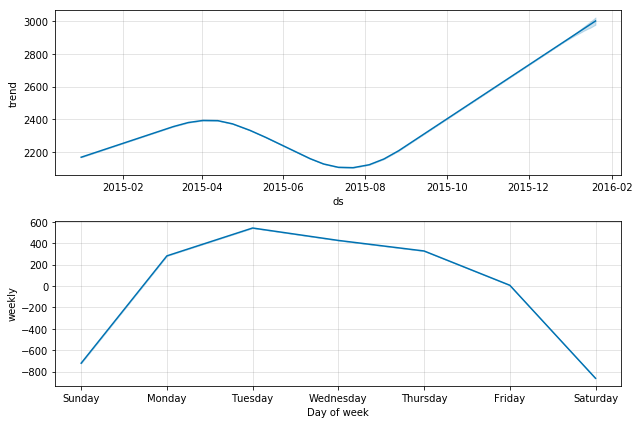

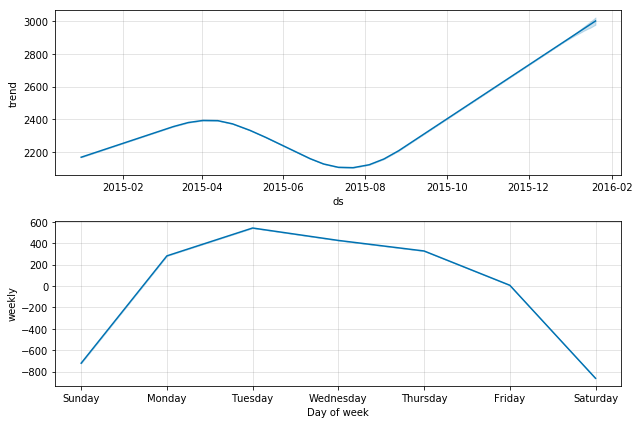

In [17]:
#Дополнительные графики
prophet.plot_components(predict_df)

**Вопрос 2**: Какое получилось MAPE?

**Вопрос 3**: Какое получилось MAE?

## Предсказываем с помощью ARIMA

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
plt.rcParams['figure.figsize'] = (15, 10)

**Вопрос 4:** Проверим стационарность ряда с помощью критерия Дики-Фулера. Является ли ряд стационарным? Какое значение p-value?

In [19]:
## ВАШ КОД для проверки стационарности ряда ##
result = sm.tsa.stattools.adfuller(train_df['y'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.534118
p-value: 0.107392
Critical Values:
	1%: -3.450
	5%: -2.870
	10%: -2.571


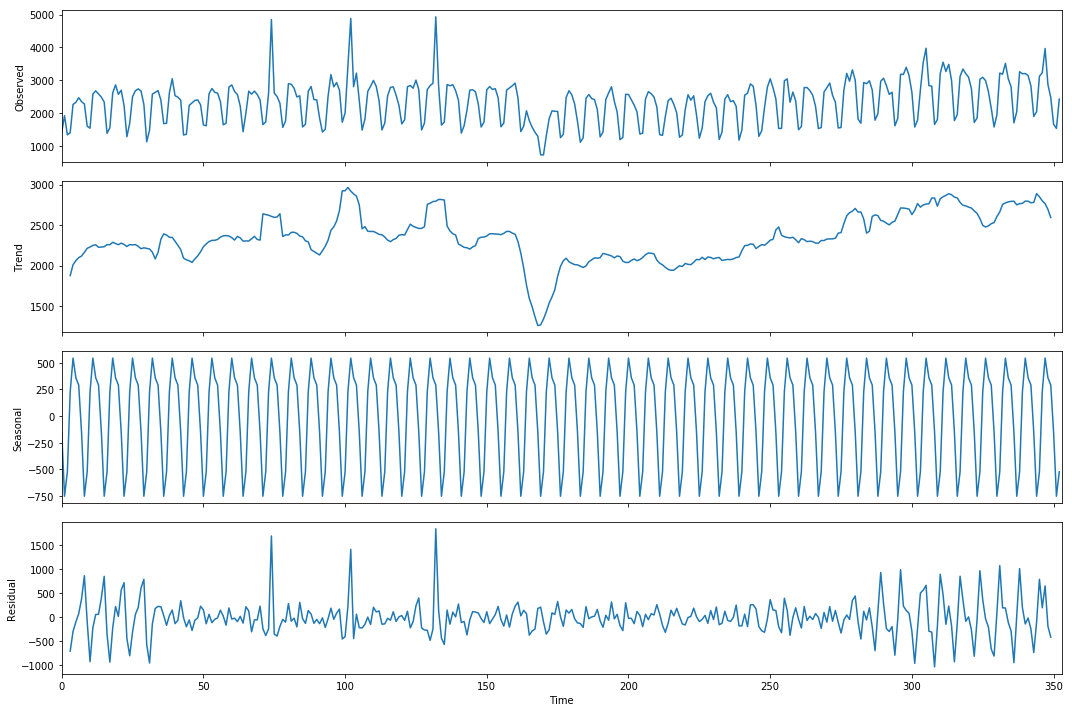

In [20]:
#Дополнительные графики
sm.tsa.seasonal_decompose(train_df['y'].values, freq=7).plot();

А вот сезонно продифференцированный ряд уже будет стационарным.

In [21]:
train_df.set_index('ds', inplace=True)

Критерий Дики-Фуллера: p=0.000000


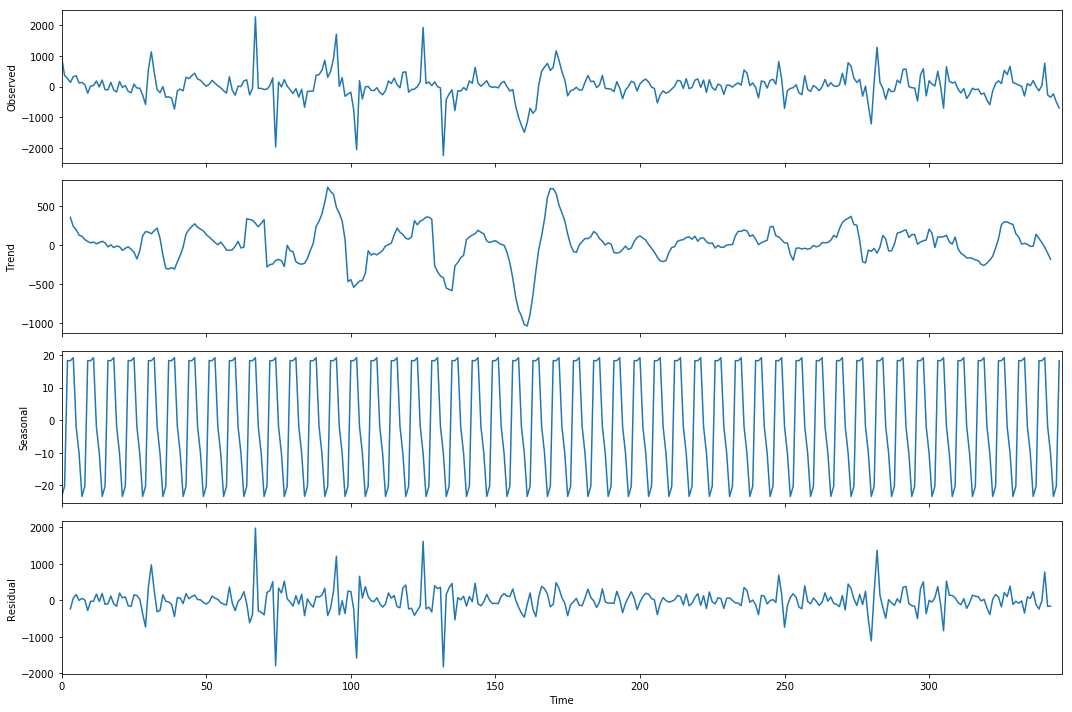

In [22]:
train_df['y_diff'] = train_df.y - train_df.y.shift(7)
sm.tsa.seasonal_decompose(train_df.y_diff[7:].values, freq=7).plot();
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(train_df.y_diff[8:])[1])

**Вопрос 5**: Далее перейдем к построению модели SARIMAX (`sm.tsa.statespace.SARIMAX`). Модель c какими параметрами лучшая по `AIC`-критерию?

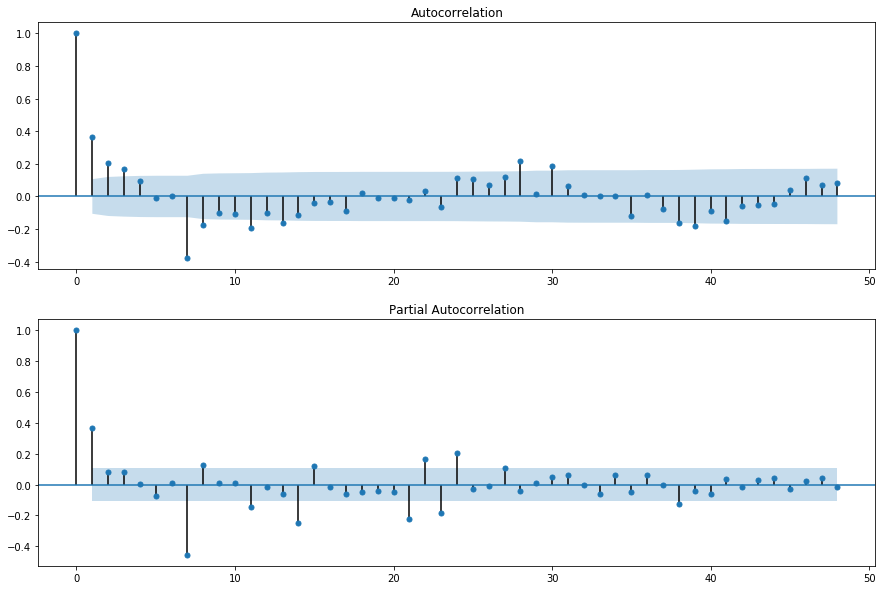

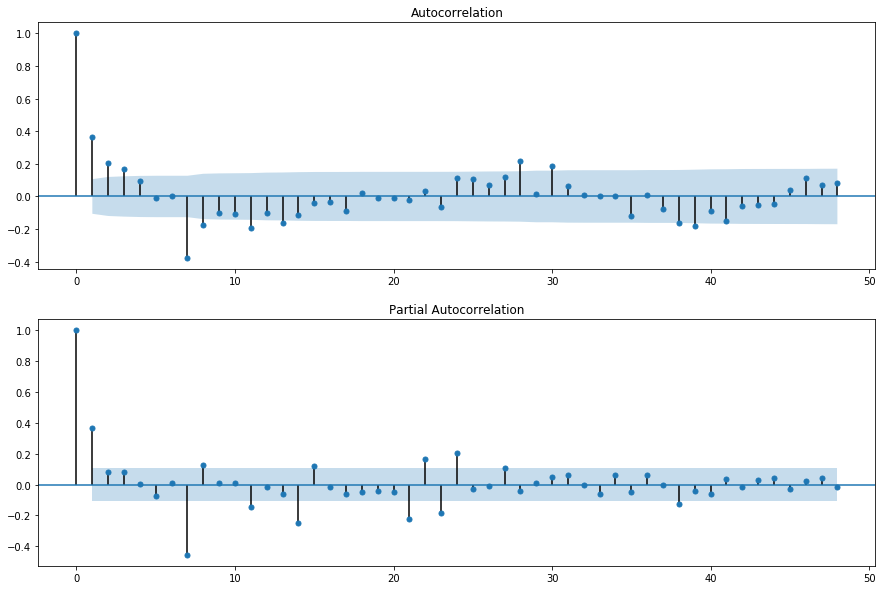

In [23]:
train_df['y_diff'] = train_df.y - train_df.y.shift(7)

ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(train_df.y_diff[13:].values.squeeze(), lags=48, ax=ax)

ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(train_df.y_diff[13:].values.squeeze(), lags=48, ax=ax)

In [24]:
## ВАШ КОД для построения модели ##
p = 1
ds = range(0, 2)
q = 2
P = 3
Ds = range(0, 3)
Qs = range(0, 2)

In [25]:
from itertools import product

parameters = product(ds, Ds, Qs)
parameters_list = list(parameters)
len(parameters_list)

12

In [26]:
%%time
results = []
best_aic = float("inf")

for param in tqdm(parameters_list):
    print(param)
    #try except нужен, потому что на некоторых наборах параметров модель не обучается
    try:
        model=sm.tsa.statespace.SARIMAX(train_df['y'], order=(p, param[0], q), 
                                        seasonal_order=(P, param[1], param[2], 7)).fit(disp=-1)
    #выводим параметры, на которых модель не обучается и переходим к следующему набору
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    #сохраняем лучшую модель, aic, параметры
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])
    
warnings.filterwarnings('default')

  0%|                                                                                           | 0/12 [00:00<?, ?it/s]

(0, 0, 0)


G:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



wrong parameters: (0, 0, 0)
(0, 0, 1)


G:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



wrong parameters: (0, 0, 1)
(0, 1, 0)


G:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

G:\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1051: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

 25%|████████████████████▊                                                              | 3/12 [00:08<00:24,  2.70s/it]

(0, 1, 1)


G:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

 33%|███████████████████████████▋                                                       | 4/12 [00:13<00:27,  3.41s/it]

(0, 2, 0)


G:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

G:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

 42%|██████████████████████████████████▌                                                | 5/12 [00:35<00:49,  7.05s/it]

(0, 2, 1)


G:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



LinAlgError: Singular matrix

In [27]:
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

  parameters          aic
0  (0, 1, 0)  5022.312524
1  (0, 1, 1)  5022.982392
2  (0, 2, 0)  5069.072616


In [28]:
print(best_model.summary())

                                 Statespace Model Results                                
Dep. Variable:                                 y   No. Observations:                  353
Model:             SARIMAX(1, 0, 2)x(3, 1, 0, 7)   Log Likelihood               -2504.156
Date:                           Sun, 05 Aug 2018   AIC                           5022.313
Time:                                   03:29:54   BIC                           5049.238
Sample:                                        0   HQIC                          5033.034
                                           - 353                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8633      0.092      9.346      0.000       0.682       1.044
ma.L1         -0.4015      0.101     -3.979

<b>D = 1, d = 0, Q = 0, q = 2, P = 3, p = 1</b>

### Использование преобразования Бокса-Кокса

In [29]:
train_df['y_box'], lmbda = stats.boxcox(train_df['y']) 
print("Оптимальный параметр преобразования Бокса-Кокса: %f" % lmbda)

Оптимальный параметр преобразования Бокса-Кокса: 0.732841


In [30]:
results2 = []
best_aic = float("inf")

for param in tqdm(parameters_list):
    #try except нужен, потому что на некоторых наборах параметров модель не обучается
    try:
        model=sm.tsa.statespace.SARIMAX(train_df['y_box'], order=(p, param[0], q), 
                                            seasonal_order=(P, param[1], param[2], 7)).fit(disp=-1)
    #выводим параметры, на которых модель не обучается и переходим к следующему набору
    except (ValueError, np.linalg.LinAlgError):
        continue
    aic = model.aic
    #сохраняем лучшую модель, aic, параметры
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results2.append([param, model.aic])
    
warnings.filterwarnings('default')


  0%|                                                                                           | 0/12 [00:00<?, ?it/s]G:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

G:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

G:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

G:\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1051: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an arra

In [31]:
result_table2 = pd.DataFrame(results2)
result_table2.columns = ['parameters', 'aic']
print(result_table2.sort_values(by = 'aic', ascending=True).head())

  parameters          aic
3  (0, 2, 1)  3528.652920
6  (1, 2, 1)  3534.540192
0  (0, 1, 0)  3556.880030
1  (0, 1, 1)  3557.003105
5  (1, 1, 1)  3557.844750


In [32]:
result_table2[result_table2['parameters'].isin([(0, 1, 0),
                                                (0, 1, 1),
                                                (0, 2, 0)])].sort_values(by = 'aic')

,parameters,aic
0,"(0, 1, 0)",3556.880030
1,"(0, 1, 1)",3557.003105
2,"(0, 2, 0)",3612.237874


In [33]:
print(best_model.summary())

                                 Statespace Model Results                                
Dep. Variable:                             y_box   No. Observations:                  353
Model:             SARIMAX(1, 0, 2)x(3, 2, 1, 7)   Log Likelihood               -1756.326
Date:                           Sun, 05 Aug 2018   AIC                           3528.653
Time:                                   03:33:20   BIC                           3559.261
Sample:                                        0   HQIC                          3540.850
                                           - 353                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8181      0.118      6.908      0.000       0.586       1.050
ma.L1         -0.3342      0.125     -2.680

Критерий Стьюдента: p=0.114891
Критерий Дики-Фуллера: p=0.000000


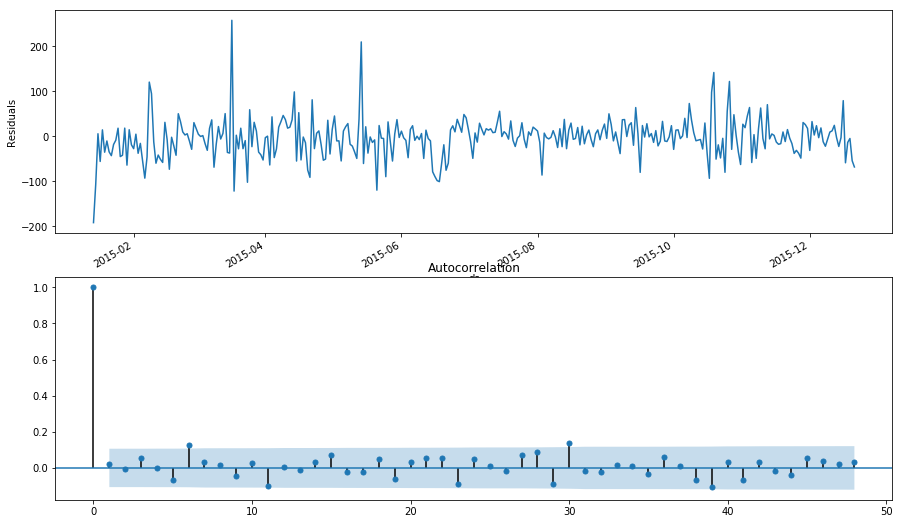

In [34]:
plt.subplot(211)
best_model.resid[13:].plot()
plt.ylabel(u'Residuals')

ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=48, ax=ax)

print("Критерий Стьюдента: p=%f" % stats.ttest_1samp(best_model.resid[13:], 0)[1])
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(best_model.resid[13:])[1])

In [35]:
#Дополнительные графики
def invboxcox(y, lmbda):
    #Обратное преобразование Бокса-Кокса
    if lmbda == 0:
        return(np.exp(y))
    else:
        return(np.exp(np.log(lmbda * y + 1) / lmbda))

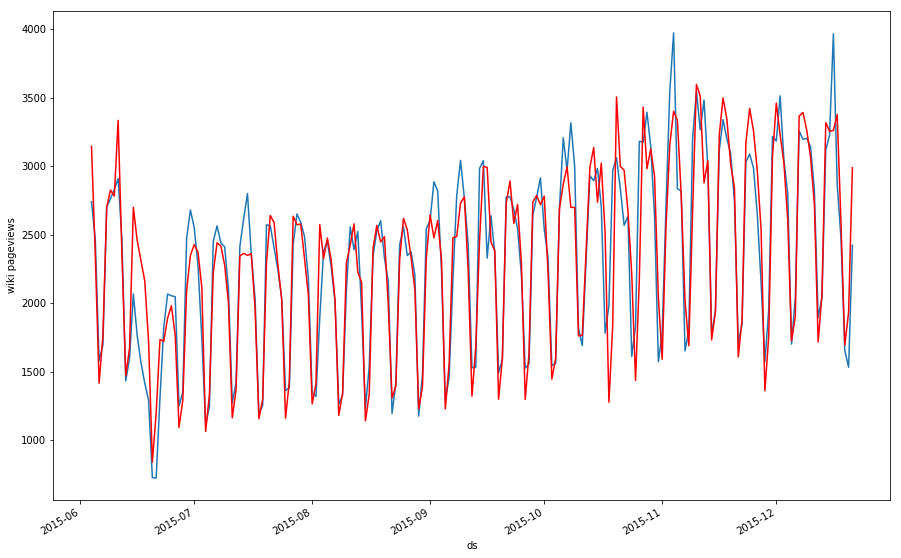

In [36]:
train_df['arima_model'] = invboxcox(best_model.fittedvalues, lmbda)

train_df.y.tail(200).plot()
train_df.arima_model[13:].tail(200).plot(color='r')
plt.ylabel('wiki pageviews');

# 8/10